# Descriptive information about anesthetists

So far, no one has described the current data available for the number or distribution of the various cadres of anethetists in Uganda. 

My primary questions concern both physician anesthestics and non-physician anesthestists. Primarily,
- How many are there?
- Where are they (ie, distributed rural vs urban)?
- How were they educated?
- How much money do they make?
- How many are being trained?

Note: My citations will look funny in this notebook. Please see this [BibTex file](https://github.com/alexgoodell/uganda-model/blob/master/refs/library.bib) for the current list of my citations.

## Physician anesthetists

According to the WFSA, in Uganda, there are 3,361 physicians (for a physician-to-population ratio of 0.18 per 100,000), 263 of which are surgerons, 72 of which are physican anesthtists, and 47 physician providers that have an anaesthetic qualification. <cite data-cite="wfsaug2018"><a href="#ref-wfsaug2018">(wfsaug2018)</a></cite>. In 2004, 2005, and 2015 (the only data published by the WHO) there were 2209, 3361, and 3645 physicians country-wide. <cite data-cite="whogho2018"><a href="#ref-whogho2018">(whogho2018)</a></cite>

Data concerning the number and location of physician anesthetists was obtained from the Uganda Medical and Dental Practitioners Council Registry website <cite data-cite="umdpc2018reg"><a href="#ref-umdpc2018reg">(umdpc2018reg)</a></cite>.  Extracted data can be found in our GitHub repository, under "data/umdpc/." Filenames were changed to exclude spaces and extract date was included in the title.


In [428]:
# import requirements (all found in /model/py/requirements.txt)
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt, mpld3
import seaborn as sns
from num2words import num2words
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from __future__ import division
from titlecase import titlecase

# maximizes output
verbose = False

# function for easy printing
def nprint(q):
    print list(q.astype(str))
    
# function for conversion to title case
def emtc(x):
    if len(str(x)) > 5:
        return titlecase(str(x))  
    else:
        return str(x)

In [429]:
# Notes on reading python code
# NaN = not a number, the python equivlent of "null"/"nil"/"NA"
# pandas (pd) is the main data analysis tool and uses dataframes (df), similar to R

# read in data for "full registry - skip first three rows (header information)
df = pd.read_excel("../../data/umdpc/full-register-3-13-2018.xls", skiprows=3, header=0)
# show first 5 rows
df.head(5)

,Reg No.,Surname,Other Name,Sex,Employer,Postal Address,BOX,CITYTOWN,First Registration,PROFES,...,PROFES03,AWARD03,COUNTRY03,YEAR03,Unnamed: 30,PROFES04,AWARD04,COUNTRY04,YEAR04,Speciality
0,H2441,AACA OKUI,LILLIAN,F,NaN,"P.O BOX 7072, KAMPALA",7072,KAMPALA,"MBChB,MUK,UGANDA,2003",MBChB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F0186,AANYU,HELLEN TUKAMUHEBWA,F,MULAGO HOSPITAL,"P.O BOX 21846, KAMPALA",21846,KAMPALA,"MBChB,MUST,UGANDA,1995",MBChB,...,CERT. PULMONOLOGY,CAPE TOWN & RED CROSS,SA,2010,NaN,NaN,NaN,NaN,NaN,"PAEDIATRIC PULMONOLOGY, ALLERGY"
2,I3717,ABACH,JAMES,M,CASE MEDICAL CENTRE,"P.O BOX 4547, KAMPALA",4547,KAMPALA,"MBChB,MUK,UGANDA,2010",MBChB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAEDIATRICS
3,J5344,ABACHU,SIMON,M,NaN,"P.O BOX 91031, KAMPALA",91031,KAMPALA,"MD,BLIDA,ALGERIA,2014",MD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I3770,ABAHO,RWABYONA SHELLINA,F,NaN,"P.O BOX 488, KABALE",488,KABALE,"MBChB,MUST,UGANDA,2011",MBChB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
# Fix the whitespace in the column names, replace strings with underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
nprint(df.columns)

['reg_no.', 'surname', 'other_name', 'sex', 'employer', 'postal_address', 'box', 'citytown', 'first_registration', 'profes', 'award', 'country', 'year', 'date_of_first_registration', 'additional_qualification(s)', 'unnamed:_15', 'profes01', 'award01', 'country01', 'year01', 'unnamed:_20', 'profes02', 'award02', 'country02', 'year02', 'unnamed:_25', 'profes03', 'award03', 'country03', 'year03', 'unnamed:_30', 'profes04', 'award04', 'country04', 'year04', 'speciality']


In [431]:
# Let's find what all these columns are for

# Find all rows with null values in any column
any_null = df.isnull().any(axis=1)

# Find the inverse
not_any_null = any_null.apply(lambda x: not x)

# Print the columns of question for a few rows, (transformed then limited to ten cols, which are now rows)
df[not_any_null][['first_registration', 'profes', 'award', 'country', 'year', 'additional_qualification(s)',
                  'unnamed:_15','profes01','award01','country01', 'year01','unnamed:_20', 'profes02','award02', 
                  'country02','year02', 'unnamed:_25','profes03', 'award03','country03', 'year03', 'unnamed:_30', 
                  'profes04','award04', 'country04','year04' ]][:1].T

,528
first_registration,"MBChB,MUK,UGANDA,1978"
profes,MBChB
award,MUK
country,UGANDA
year,1978
additional_qualification(s),"PhD,DUBLIN,IRELAND,1987,MRCP,RCP,IRELAND,1987,..."
unnamed:_15,"PhD,DUBLIN,IRELAND,1987"
profes01,PhD
award01,DUBLIN
country01,IRELAND


In [432]:
# Rename columns to more useful 
df = df.rename(columns={
    'reg_no.':'reg_no',
    'first_registration': 'concat_degree1', 'profes': 'degree_degree1',
    'award': 'program_degree1', 'country': 'country_degree1','year': 'year_degree1',
    'unnamed:_15': 'concat_degree2', 'profes01': 'degree_degree2', 'award01': 'program_degree2', 
    'country01': 'country_degree2', 'year01': 'year_degree2', 'unnamed:_20': 'concat_degree3',
    'profes02': 'degree_degree3', 'award02': 'program_degree3', 'country02': 'country_degree3',
    'year02': 'year_degree3', 'unnamed:_25': 'concat_degree4','profes03': 'degree_degree4',
    'award03': 'program_degree4','country03': 'country_degree4','year03': 'year_degree4',
    'unnamed:_30': 'concat_degree5', 'profes04': 'degree_degree5', 'award04': 'program_degree5',
    'country04': 'country_degree5', 'year04': 'year_degree5'
})

# Confirm rename
nprint(df.columns)

['reg_no', 'surname', 'other_name', 'sex', 'employer', 'postal_address', 'box', 'citytown', 'concat_degree1', 'degree_degree1', 'program_degree1', 'country_degree1', 'year_degree1', 'date_of_first_registration', 'additional_qualification(s)', 'concat_degree2', 'degree_degree2', 'program_degree2', 'country_degree2', 'year_degree2', 'concat_degree3', 'degree_degree3', 'program_degree3', 'country_degree3', 'year_degree3', 'concat_degree4', 'degree_degree4', 'program_degree4', 'country_degree4', 'year_degree4', 'concat_degree5', 'degree_degree5', 'program_degree5', 'country_degree5', 'year_degree5', 'speciality']


In [433]:
# Look for missing values in key fields
key_demographic_fields = ['reg_no', 'surname', 'other_name', 'sex']
df[key_demographic_fields].notnull().sum()

reg_no        5219
surname       5222
other_name    5222
sex           5222
dtype: int64

In [434]:
# There is at least one person missing a reg number
df[df.reg_no.isnull()][key_demographic_fields]

,reg_no,surname,other_name,sex
2082,NaN,KUNGU,SULAIMAN PETER,M
4465,NaN,RUGUMAYO,NATASHA,F
4950,NaN,TURANZOMWE,STUART,M


In [435]:
# Looks like there are three, but they seem to be real people, so I will keep them

number_of_physicians_per_registry = df[key_demographic_fields].notnull().sum().max()
unregistered_physicians_per_registry = df[['surname']].notnull().sum().max() - df[['reg_no']].notnull().sum().max()
print number_of_physicians_per_registry, unregistered_physicians_per_registry

5222 3


In [436]:
# Let's compare this two what was in the licensing file
ldf = pd.read_excel("../../data/umdpc/licenced-medical-and-dental-practitioners-3-13-2018.xls", skiprows=3, header=0)
# repeat the cleanup process from above, make it a function so we don't have to repeat
ldf.columns = ldf.columns.str.strip().str.lower().str.replace(' ', '_')
# Inspect missing fields in the license data file
print "\n non-null values: \n\n {}".format(ldf.notnull().sum())
number_of_lic_physicians_per_registry = ldf.surname.notnull().sum()
print "\n number of physicians licensed: {}".format(number_of_lic_physicians_per_registry)


 non-null values: 

 surname        2996
other_names    2996
receipt        2926
serial         2966
date           2995
speciality      958
dtype: int64

 number of physicians licensed: 2996


In [437]:
# This gives us a confusing picture of # active docs
# Let's see how many physicians are actively practicing using their "employer" field

# Assign a dummy var to all real people - .loc[x,y] finds rows that met x (: mean all, and sets y)
df.loc[:, "dummy"] = df.surname.notnull()

# First, let's just see how many list a place of employment
number_of_physicians_employed_per_registry = df[df.employer.notnull()].dummy.count()
print number_of_physicians_employed_per_registry

3786


In [438]:
# Freq table for most common hospitals to work at
df["employer"] = df[df.employer.notnull()].employer.apply(emtc)

q = df['employer'].value_counts()[:15].to_frame().rename(columns={'employer':'num_docs_employed'})
q.index.name = "employer"
print q

                          num_docs_employed
employer                                   
Mulago Hospital                         242
Makerere University                     107
Infectious Disease Inst.                 76
Ministry of Health                       71
Mengo Hospital                           67
Nsambya Hospital                         57
Baylor Uganda                            49
MUST                                     39
Lacor Hospital                           34
Uganda Cancer Institute                  33
Lubaga Hospital                          30
Uganda Heart Institute                   28
Medical Research Council                 27
Case Medical Centre                      26
Mildmay Uganda                           24


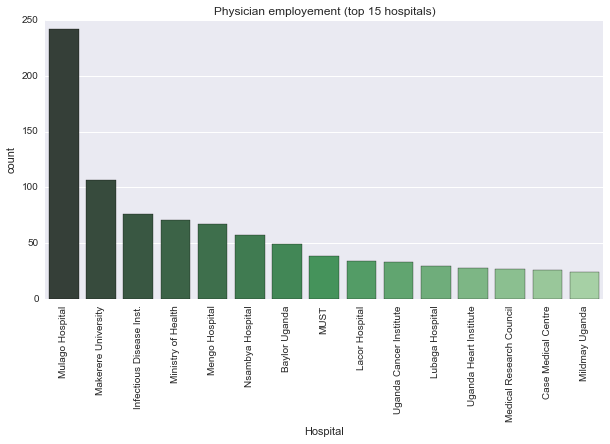

In [439]:
%matplotlib inline

# Histogram
top_15 = df['employer'].value_counts()[:15].keys().tolist()
plt.figure(figsize=(10, 5))
g = sns.countplot(x="employer", data=df[df.employer.isin(top_15)], palette="Greens_d", order=top_15)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Hospital")
_ = plt.title("Physician employement (top 15 hospitals)")

In [440]:
# Now lets turn to anesthesiologist. Using the registry data, look at the specialty

# Make speciaties lower case
df.speciality = df.speciality[df.speciality.notnull()].apply(lambda x: str(x).lower())

# Get unique speciaties
all_specialties = df[df.speciality.notnull()].speciality.unique()

# Print all
if verbose:
    print all_specialties

# Fuzzy search, find the 10 best results
print "\n Best ten results: \n\n {}".format(process.extract("anesthesia", all_specialties, limit=10))

# Find those with 80% match or more
filtered = [ str(i) for i in all_specialties if fuzz.partial_ratio(i, "anesthesia") > 80]
print "\n those with 80% match or more: \n\n {}".format(filtered)


 Best ten results: 

 [('anaesthesia', 95), ('anaesthesiology', 81), ('anaesthesia,paediatric anaesth.', 81), ('anaesthsia & intensive care', 81), ('anaesthesia,critical care& pain', 81), ('ent', 60), ('gastro-hepalolosy', 54), ('pediatrics & child health', 51), ('blood transfusion', 48), ('health services research', 45)]

 those with 80% match or more: 

 ['anaesthesia', 'anaesthesiology', 'anaesthesia,paediatric anaesth.', 'anaesthsia & intensive care', 'anaesthesia,critical care& pain']


In [441]:
# The filtered group captured the strings of interest
anes_career = filtered

# create anes df
adf = df[df.speciality.isin(anes_career)]

# look at some data
adf[['surname', 'employer', 'date_of_first_registration', 'speciality', 'degree_degree1', 'year_degree1']].head(5)

,surname,employer,date_of_first_registration,speciality,degree_degree1,year_degree1
440,ATURIA,NaN,12/22/06,anaesthesia,MBChB,1995
469,AYEBALE,Makerere University,08/07/09,anaesthesiology,MBChB,2008
490,AYUPO,Uganda Heart Institute,01/28/13,anaesthesia,MBChB,2011
764,BUGEMBE,Jinja Hospital,02/07/03,anaesthesiology,MBChB,1996
787,BUKWIRWA,NaN,03/11/99,anaesthesia,MBChB,1980


In [442]:
# summary statistics
q = adf['speciality'].value_counts().to_frame().rename(columns={'speciality':'num'})
q.index.name = "speciality"
q.loc["total","num"] = adf['speciality'].value_counts().sum()
print "from general file: \n\n{}".format(q)

from general file: 

                                 num
speciality                          
anaesthesia                       36
anaesthesiology                    8
anaesthesia,paediatric anaesth.    1
anaesthesia,critical care& pain    1
anaesthsia & intensive care        1
total                             47


In [443]:
# 47 is quite a bit less that what the WFSA reports. Let's cross-check with the "specialities" database.
sdf = pd.read_excel("../../data/umdpc/licenced-medical-and-dental-practitioners-3-13-2018.xls", skiprows=3, header=0)

# repeat the cleanup process from above - strip colums, lower case, and remove blank records
sdf.columns = sdf.columns.str.strip().str.lower().str.replace(' ', '_')
sdf.speciality = sdf[sdf.speciality.notnull()].speciality.apply(lambda x: str(x).lower())
sdf = sdf[sdf.surname.notnull()]

# see if specialities are same in this file - Get unique speciaties then fuzzy search
all_specialties = sdf[sdf.speciality.notnull()].speciality.unique()
filtered = [ str(i) for i in all_specialties if fuzz.partial_ratio(i, "anesthesia") > 80]
print filtered

['anaesthesia', 'anaesthesiology', 'anaesthesia,paediatric anaesth.', 'anaesthsia & intensive care', 'anaesthesia,critical care& pain']


In [444]:
# they were the same - continue
# summary statistics
anes_career = filtered
sdf = sdf[sdf.speciality.isin(anes_career)]
q = sdf['speciality'].value_counts().to_frame().rename(columns={'speciality':'num'})
q.index.name = "speciality"
q.loc["total","num"] = adf['speciality'].value_counts().sum()
print "from specialist file: \n\n{}".format(q)

from specialist file: 

                                 num
speciality                          
anaesthesia                       23
anaesthesiology                    3
anaesthesia,paediatric anaesth.    1
anaesthesia,critical care& pain    1
anaesthsia & intensive care        1
total                             47


In [445]:
# That confirms the number. Let's look at more data. 

num_physician_anesthesthetist = q.loc["total","num"] = adf['speciality'].value_counts().sum()

# Make a dataframe
degree_list = adf['degree_degree1'].tolist() + \
    adf['degree_degree2'].tolist() + \
    adf['degree_degree3'].tolist() + \
    adf['degree_degree4'].tolist() + \
    adf['degree_degree5'].tolist()
# Make dataframe and drop NaN (not a number)
ddf = pd.DataFrame(degree_list, columns={'degree'}).dropna(axis=0, how='all')
print ddf.degree.unique().tolist()

# Merge identical degrees
dip = ['DIP ANAESTH','DIP ANAEST','DIP.ANAESTH']
mmed = ['M.MED ANAES', 
        'M.MED ANAESTHESIA', 
        'M MED ANAESTH', 
        'M.MED. ANAESTHESIA', 
        'M MED. ANAESTHESIA', 
        'M.MED.ANAESTHESIA', 
        'M MED. ANAES', 
        'M MED ANAESTHESIA', 
        'M MED. ANAESTH.', 
        'M.MED.ANAESTH.']

ddf.loc[ddf.degree == 'MBCHB'] = 'MBChB'
ddf.loc[ddf.degree.isin(dip)] = 'Diploma in Anesthesia'
ddf.loc[ddf.degree.isin(mmed)] = 'MMed in Anesthesia'

print ddf.degree.unique().tolist()


[u'MBChB', u'MBBS', u'MBCHB', u'DIP ANAESTH', u'M.MED ANAES', u'M.MED ANAESTHESIA', u'M MED ANAESTH', u'M.MED. ANAESTHESIA', u'M MED. ANAESTHESIA', u'FRCA', u'M.MED.ANAESTHESIA', u'M MED. ANAES', u'M MED ANAESTHESIA', u'M MED. ANAESTH.', u'DIP ANAEST', u'M.MED.ANAESTH.', u'FFARCS', u'FCA', u'DIP.ANAESTH', u'FELLOWSHIP OBS&GYN', u'FRCSI', u'FELLOWSHIP IN CARDIAC ANAES.']
[u'MBChB', u'MBBS', 'Diploma in Anesthesia', 'MMed in Anesthesia', u'FRCA', u'FFARCS', u'FCA', u'FELLOWSHIP OBS&GYN', u'FRCSI', u'FELLOWSHIP IN CARDIAC ANAES.']


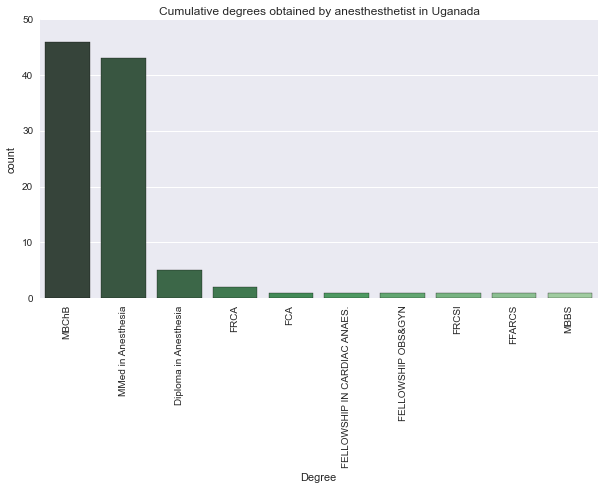

In [446]:
%matplotlib inline

# Histogram
ordered_list = ddf['degree'].value_counts().keys().tolist()
plt.figure(figsize=(10, 5))
g = sns.countplot(x="degree", data=ddf, palette="Greens_d", order=ordered_list)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Degree")
_ = plt.title("Cumulative degrees obtained by anesthesthetist in Uganada")

In [447]:
num_phys_anes_holding_mmed = adf[(adf.degree_degree1.isin(mmed) | \
                            adf.degree_degree2.isin(mmed) | \
                            adf.degree_degree3.isin(mmed) | \
                            adf.degree_degree4.isin(mmed) | \
                            adf.degree_degree5.isin(mmed))] \
                            .dummy.sum()
    
prop_phys_anes_w_mmed = num_phys_anes_holding_mmed / num_physician_anesthesthetist

print "num_phys_anes_holding_mmed: {}".format(num_phys_anes_holding_mmed)
print "num_physician_anesthesthetist: {}".format(num_physician_anesthesthetist)
print "prop_phys_anes_w_mmed: {:.0%}".format(prop_phys_anes_w_mmed)

num_phys_anes_holding_mmed: 43
num_physician_anesthesthetist: 47
prop_phys_anes_w_mmed: 91%


### Number of physicians - methods

Three files were used: the main registry, the licensing database, and the specialist database. Data was cleaned by removing whitespace and formatting oddities as documented in the supplement. 

### Number of physicians - results
On the main registry, there were {{number_of_physicians_per_registry}} physicians listed, {{number_of_physicians_employed_per_registry}} of whom listed a place of employment. There were {{unregistered_physicians_per_registry}} with no registration number. The licensing database revealed that {{number_of_lic_physicians_per_registry}} were licensed. The remaining {{number_of_physicians_per_registry - number_of_lic_physicians_per_registry}} who were missing from the license file are either (1) no longer in practice or (2) lapsed in their annual licensing.  

According to the registration documents, there are {{num_physician_anesthesthetist}} physician anesthesthetists, {{"{:.0%}".format(prop_phys_anes_w_mmed)}} of which ({{num_phys_anes_holding_mmed}}) hold an MMed.


# References
---------------------------

<div id="refs" class="references">
<div id="ref-aau2018" stlye="margin-top:10px">
<p> --- aau2018 --- Association of Anesthesiologist of Uganda. (2018). Bachelors of science in anaesthesia. Retrieved from <a href="http://www.anesthesiaug.org/bachelors/" class="uri">http://www.anesthesiaug.org/bachelors/</a></p>
</div>
<div id="ref-ahpcschools2016">
<p> --- ahpcschools2016 --- uganda allied health professionals council. (2016). AHPC recognized training institutions 2016. Retrieved from <a href="http://www.ahpc.ug/schools.php" class="uri">http://www.ahpc.ug/schools.php</a></p>
</div>
<div id="ref-Banerjee2005Mar">
<p> --- Banerjee2005Mar --- Banerjee, S., Faiz, O., Rennie, J. A., Balyejjusa, J., &amp; Walsh, M. (2005). Bridging the health gap in Uganda: The surgical role of the clinical officer. <em>Afr. Health Sci.</em>, <em>5</em>(1), 86–89. Retrieved from <a href="http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1831898" class="uri">http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1831898</a></p>
</div>
<div id="ref-dsco2012">
<p> --- dsco2012 --- DISTRICT SERVICE COMMISSIONS OF UGANDA. (2012). DISTRICT service commissions of uganda health vacancies. DISTRICT SERVICE COMMISSIONS OF UGANDA. Retrieved from <a href="http://health.go.ug/docs/final_advert.pdf" class="uri">http://health.go.ug/docs/final_advert.pdf</a></p>
</div>
<div id="ref-examboard2015">
<p> --- examboard2015 --- Uganda Allied Health Examinations Board. (2015). Newsletter. Retrieved from <a href="http://uaheb.go.ug/wp-content/uploads/2016/06/Newsletter.pdf" class="uri">http://uaheb.go.ug/wp-content/uploads/2016/06/Newsletter.pdf</a></p>
</div>
<div id="ref-examboardschools">
<p> --- examboardschools --- Uganda Allied Health Examinations Board. (2018). Accredited school. Retrieved from <a href="http://uaheb.go.ug/accredited-schools/" class="uri">http://uaheb.go.ug/accredited-schools/</a></p>
</div>
<div id="ref-hcsurvey2014">
<p> --- hcsurvey2014 --- African Development Bank, M. W. (2014). Uganda hospital and health centre iv census survey. Retrieved from <a href="http://www.who.int/healthinfo/systems/SARA_H_UGA_Results_2014.pdf" class="uri">http://www.who.int/healthinfo/systems/SARA_H_UGA_Results_2014.pdf</a></p>
</div>
<div id="ref-intra2015">
<p> --- intra2015 --- Vincent Oketcho, J. O., Isaac Ezati. (2015). UGANDA on track for keeping human resources for health commitments. Retrieved from <a href="http://www.who.int/workforcealliance/media/news/2015/HRH_Commitments_Uganda_Case_Study.pdf" class="uri">http://www.who.int/workforcealliance/media/news/2015/HRH_Commitments_Uganda_Case_Study.pdf</a></p>
</div>
<div id="ref-kakande2011review">
<p> --- kakande2011review --- Kakande, I., Mkandawire, N., &amp; Thompson, M. (2011). A review of surgical capacity and surgical education programmes in the cosecsa region. <em>East and Central African Journal of Surgery</em>, <em>16</em>(3), 6–34. Retrieved from <a href="http://www.bioline.org.br/request?js11047" class="uri">http://www.bioline.org.br/request?js11047</a></p>
</div>
<div id="ref-Klopper2012-pp">
<p> --- Klopper2012-pp --- Klopper, H., &amp; Uys, L. R. (2012). <em>The State of Nursing and Nursing Education in Africa: A {Country-By-Country} Review</em>. Sigma Theta Tau.</p>
</div>
<div id="ref-lacoranes2018">
<p> --- lacoranes2018 --- Lacor School of Anesthesia. (2018). Lacor school of anesthesia. Retrieved from <a href="http://mambosms.ug/Data/atha/lacorh/?page_id=7346" class="uri">http://mambosms.ug/Data/atha/lacorh/?page_id=7346</a></p>
</div>
<div id="ref-Linden2012-sw">
<p> --- Linden2012-sw --- Linden, A. F., Sekidde, F. S., Galukande, M., Knowlton, L. M., Chackungal, S., &amp; McQueen, K. A. K. (2012). Challenges of surgery in developing countries: a survey of surgical and anesthesia capacity in Uganda’s public hospitals. <em>World J. Surg.</em>, <em>36</em>(5), 1056–1065.</p>
</div>
<div id="ref-mak2018">
<p> --- mak2018 --- Makarere University. (n.d.). Application requirements - direct entry. Retrieved from <a href="https://www.mak.ac.ug/application-procedures/direct-entry" class="uri">https://www.mak.ac.ug/application-procedures/direct-entry</a></p>
</div>
<div id="ref-MOH-hosp-list">
<p> --- MOH-hosp-list --- Ministry of Health. (2018). List of Hospitals. Retrieved from <a href="http://health.go.ug/affiliated-institutions/hospitals" class="uri">http://health.go.ug/affiliated-institutions/hospitals</a></p>
</div>
<div id="ref-mohscholar2017">
<p> --- mohscholar2017 --- Ministry of Health. (2017). ANNOUNCEMENT of scholarships for academic year 2017/2018. Retrieved from <a href="https://www.mnh.musph.ac.ug/wp-content/uploads/2016/10/MIN-OF-HEALTH.-scholarships.pdf" class="uri">https://www.mnh.musph.ac.ug/wp-content/uploads/2016/10/MIN-OF-HEALTH.-scholarships.pdf</a></p>
</div>
<div id="ref-mugalopara2013">
<p> --- mugalopara2013 --- Uganda Allied Health Institute and Management Sciences Mugalo. (2018). Post-basic programs uganda allied health institute and management sciences mugalo. Retrieved from <a href="http://uiahms.ac.ug/anaesthesia/" class="uri">http://uiahms.ac.ug/anaesthesia/</a></p>
</div>
<div id="ref-must2014">
<p> --- must2014 --- Mbarara University of Science and Technology. (n.d.). Admission Requirements. Retrieved from <a href="http://www.must.ac.ug/news/2014-must-private-admissions-advert" class="uri">http://www.must.ac.ug/news/2014-must-private-admissions-advert</a></p>
</div>
<div id="ref-roth2014role">
<p> --- roth2014role --- Roth, R., Frost, E. A., Gevirtz, C., &amp; Atcheson, C. L. (2014). <em>The role of anesthesiology in global health: A comprehensive guide</em>. Springer.</p>
</div>
<div id="ref-UBS2017">
<p> --- UBS2017 --- Ugandan Bureau of Statistics. (2017). Statistical Abstract.</p>
</div>
<div id="ref-umdpc2018reg">
<p> --- umdpc2018reg --- Uganda Medical and Dental Practitioners Council. (n.d.). Uganda medical and dental practitioners council registry. Retrieved from <a href="http://www.umdpc.com/registers.php" class="uri">http://www.umdpc.com/registers.php</a></p>
</div>
<div id="ref-UNFPA2009">
<p> --- UNFPA2009 --- United Nations Fund for Population Activities. (2009). The State of Midwifery Training, Service and Practice in Uganda Assessment Report, (July), 1–92.</p>
</div>
</div>

The remaining is code snippets for later.

In [448]:
# def cstr(s, color='black'):
#     return "<text style=color:{}>{}</text>".format(color, s)

# import pprint
# pp = pprint.PrettyPrinter(depth=1)
# pp.pprint(list(df.columns.astype(str)))

# They added columns to differentiate specialties. These need to be removed. Let's see if they have any other info
# df[df.surname.isnull()]


# f, axarr = plt.subplots(1,2, figsize=(16, 5)) #sharex=True, sharey=True)

# r = sns.countplot(x="employer", data=df[df.employer.isin(top_15)], palette="Greens_d", order=top_15)
